## Exploring the ToxPost data


In [2]:
import os
os.chdir("..")
print(f'the current working directory is {os.getcwd()}')

the current working directory is /Users/Louis/ml_projects/ToxPost


In [10]:
import random
from src.data.make_dataset import load_dataframe
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Import the raw training data:

raw_data_path = "./data/raw/data.csv"
data = load_dataframe(raw_data_path, header=True, id_tag=True)

In [8]:
data.sample(n=10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
20342,Please stop. If you continue to vandalize pag...,0,0,0,0,0,0
21993,. And the article is quite long but contains o...,0,0,0,0,0,0
12286,REDIRECT Talk:Empress Wu Zetian (film),0,0,0,0,0,0
109916,"Hi, Raul654! I'm so glad to be back! I can't w...",0,0,0,0,0,0
100517,Thanks \n\nThankyou for your kind encouragemen...,0,0,0,0,0,0
7332,"You live in Nashville, right?",0,0,0,0,0,0
54786,Founding date should be 1993 \n\nThe company w...,0,0,0,0,0,0
127565,Question \n\nIf Barack Obama's certificate of ...,0,0,0,0,0,0
126064,"""\n\n You are why Wikipedia sucks \n\nAnd all ...",1,0,0,0,0,0
8344,", 1 November 2009 (UTC)\nThe change is without...",0,0,0,0,0,0


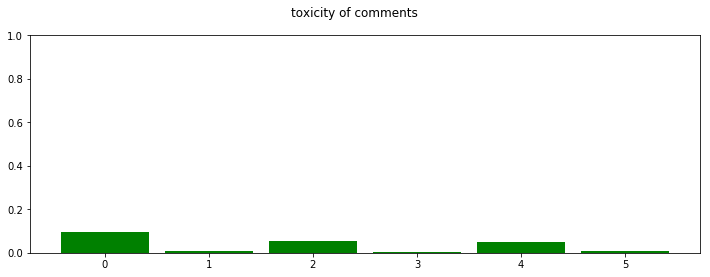

In [49]:
# Let's figure the distribution of the labels:
fig = plt.figure(figsize=(12, 4))
fig.suptitle("toxicity of comments")
plt.autoscale(enable=False, axis='y')
distribution = [sum(label[i] for label in labels)/ len(data) for i in range(0,6)]
plt.bar(np.arange(6), distribution, width = 0.85, color='g')
plt.show()

In [50]:
# As we can see, the data is very unbalanced:
print(len([label for label in labels if sum(label) != 0])/len(labels))

0.10167951369305007


In [51]:
# Only 10% of the data has nonzero labels...We'll need to balance the data...